In [3]:
from graphviz import Digraph

dot = Digraph()

dot.attr(rankdir='TB', size='10,10')

dot.node('A', 'Start')
dot.node('B', 'Display Application Title and Disclaimer')
dot.node('C', 'Input Patient\'s Name')
dot.node('D', 'Input Patient Details')
dot.node('E', 'Upload Audio File')
dot.node('F', 'Submit Details')
dot.node('G', 'Decision: Is a File Uploaded?')
dot.node('H', 'Analyze Audio File')
dot.node('I', 'Decision: Is the Patient Healthy?')
dot.node('J', 'Display "Patient is Healthy" Message')
dot.node('K', 'Prescribe Medicine')
dot.node('L', 'Display Prescription')
dot.node('M', 'Handle Errors')
dot.node('N', 'Clean Up')
dot.node('O', 'End')

dot.edges(['AB', 'BC', 'CD', 'DE', 'EF', 'FG'])
dot.edge('G', 'H', label='Yes')
dot.edge('G', 'F', label='No', constraint='false')
dot.edge('H', 'I')
dot.edge('I', 'J', label='Yes')
dot.edge('I', 'K', label='No')
dot.edge('K', 'L')
dot.edge('H', 'M', style='dashed')
dot.edge('K', 'M', style='dashed')
dot.edge('L', 'N')
dot.edge('J', 'N')
dot.edge('M', 'N', style='dashed')
dot.edge('N', 'O')

dot.render('streamlit_activity_diagram', format='png', cleanup=True)
'streamlit_activity_diagram.png'

'streamlit_activity_diagram.png'

In [2]:
import graphviz

# Create a new directed graph
dot = graphviz.Digraph(comment='The Use Case Diagram')

# Define the actors
dot.node('A', 'Patient')

# Define system boundary box
dot.node('system', 'Respiratory Disease Diagnosis and Management System', shape='rectangle')

# Define use cases within the system
dot.node('UC1', 'Enter Patient Details')
dot.node('UC2', 'Upload Audio File')
dot.node('UC3', 'Diagnose Disease')
dot.node('UC4', 'Prescribe Medicine')
dot.node('UC5', 'Display Diagnosis')
dot.node('UC6', 'Display Prescription')

# Actors to use cases
dot.edges([('A', 'UC1'), ('A', 'UC2')])

# Use case to use case within the system
dot.edge('UC2', 'UC3', constraint='false')
dot.edge('UC3', 'UC4', label='If not Healthy', constraint='false')
dot.edge('UC3', 'UC5', constraint='false')
dot.edge('UC4', 'UC6', constraint='false')

# Show the graph
dot.render('streamlit_usecase_diagram', format='png', cleanup=True)
'streamlit_usecase_diagram.png'

'streamlit_usecase_diagram.png'

In [3]:
dot = graphviz.Digraph('G', filename='use_case_diagram', engine='neato')
dot.attr(size='6,6')
dot.node_attr.update(color='lightyellow2', style='filled')

# Add system boundary
dot.attr('node', shape='plaintext')
dot.node('system', '<<boundary>>\nRespiratory Disease Diagnosis\nand Management System')

# Define actors
dot.attr('node', shape='ellipse', style='')
dot.node('Patient', 'Patient')

# Define use cases
dot.attr('node', shape='ellipse', style='filled')
dot.node('EnterPatientDetails', 'Enter Patient Details')
dot.node('UploadAudioFile', 'Upload Audio File')
dot.node('DiagnoseDisease', 'Diagnose Disease')
dot.node('PrescribeMedicine', 'Prescribe Medicine')
dot.node('DisplayDiagnosis', 'Display Diagnosis')
dot.node('DisplayPrescription', 'Display Prescription')

# Connect actors to use cases
dot.edges([
    ('Patient', 'EnterPatientDetails'),
    ('Patient', 'UploadAudioFile'),
    ('Patient', 'DiagnoseDisease'),
    ('Patient', 'PrescribeMedicine'),
    ('Patient', 'DisplayDiagnosis'),
    ('Patient', 'DisplayPrescription'),
])

# Show extension points for some use cases
dot.edge('UploadAudioFile', 'DiagnoseDisease', label='<<extends>>\nif audio file uploaded', dir='none')
dot.edge('DiagnoseDisease', 'PrescribeMedicine', label='<<extends>>\nif disease diagnosed', dir='none')
dot.edge('PrescribeMedicine', 'DisplayPrescription', label='<<extends>>\nif medicine prescribed', dir='none')

dot.render('streamlit_usecase_diagramw2', format='png', cleanup=True)
'streamlit_usecase_diagram2.png'

'streamlit_usecase_diagram2.png'

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, LSTM, Dropout, Dense
from keras_self_attention import SeqSelfAttention
import tensorflow as tf


In [2]:
#creating model usign LSTM and attention cnn
model=Sequential([
    Input(shape=(52,926)),
    
    Conv1D(64,5,padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    Conv1D(128,3,padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    
    # LSTM layers with return_sequences=True to keep temporal dimension
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    
    # Attention Layer
    SeqSelfAttention(attention_activation='sigmoid'),
    
    # Additional LSTM Layer
    LSTM(128),
    Dropout(0.5),
    
    # Dense Layers for Classification
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\J.Abdullah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            296384    
                                                                 
 batch_normalization (BatchN  (None, 52, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 26, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 128)           24704     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 128)          512       
 hNormalization)                                                 
                                                        

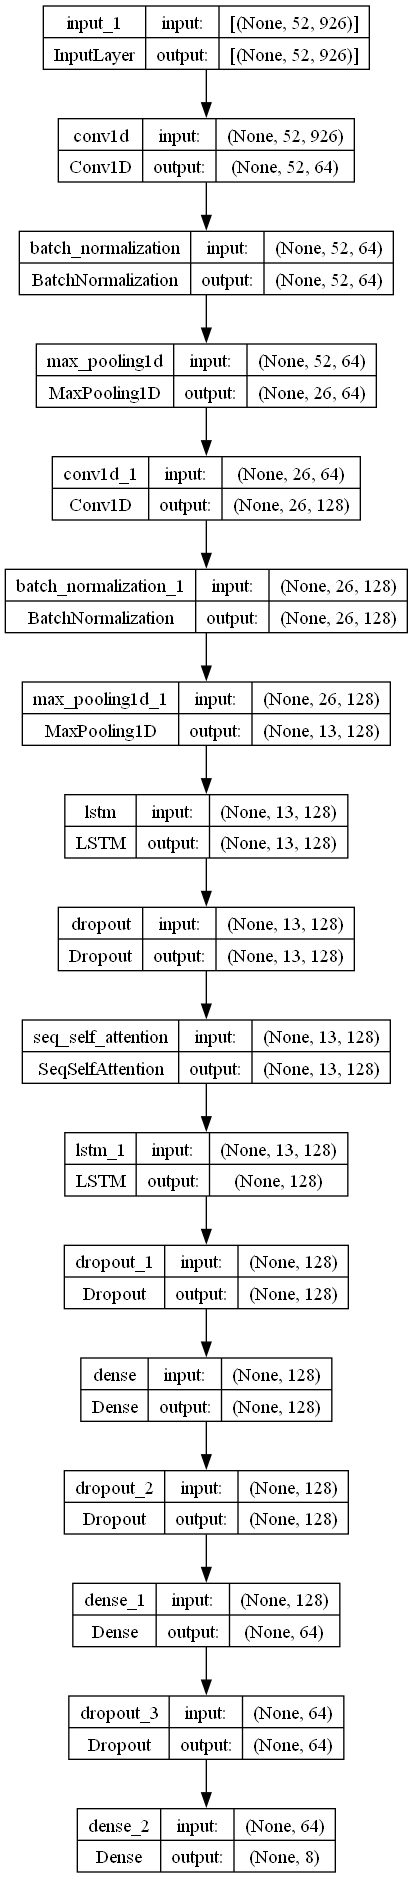

In [3]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)